In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from google.colab import files

uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (8).csv


In [3]:
import io

churn_dataset = pd.read_csv(io.BytesIO(uploaded["WA_Fn-UseC_-Telco-Customer-Churn.csv"]))
churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_dataset.drop("customerID",axis=1,inplace=True)

In [5]:
print(f"The shape of the dataset is {churn_dataset.shape}")
print(f"The length of the churn dataset is {len(churn_dataset)}")

The shape of the dataset is (7043, 20)
The length of the churn dataset is 7043


#### We have 20 columns - dividing this into 2 parts of 10 columns each to get better view of data

In [6]:
churn_part_1 = churn_dataset[churn_dataset.columns[:10]]
churn_part_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes
1,Male,0,No,No,34,Yes,No,DSL,Yes,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No


In [7]:
churn_dataset.dropna(axis=0,inplace=True)

In [8]:
churn_part_2 = churn_dataset[churn_dataset.columns[10:]]
churn_part_2.head()

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
churn_dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
print(f"The shape of the dataset is {churn_dataset.shape}")
print(f"The length of the churn dataset is {len(churn_dataset)}")

The shape of the dataset is (7043, 20)
The length of the churn dataset is 7043


In [12]:
def gender(value):
  return 0 if value == "Female" else 1

churn_dataset["gender"] = churn_dataset["gender"].apply(lambda x:gender(x))

In [13]:
def partner(value):
  return 0 if value=="No" else 1

churn_dataset["Partner"] = churn_dataset["Partner"].apply(lambda x:partner(x))

In [14]:
def Dependents(value):
  return 0 if value=="No" else 1

churn_dataset["Dependents"] = churn_dataset["Partner"].apply(lambda x:Dependents(x))

In [15]:
churn_dataset["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [16]:
def PhoneService(value):
  return 0 if value == "No" else 1

churn_dataset["PhoneService"] = churn_dataset["PhoneService"].apply(lambda x: PhoneService(x))

In [17]:
churn_dataset["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [18]:
def MultipleLines(value):
  if value=="No":
    return 0
  elif value=="Yes":
    return 1
  else:
    return 2

churn_dataset["MultipleLines"] = churn_dataset["MultipleLines"].apply(lambda x: MultipleLines(x))

In [19]:
def OnlineSecurity(value):
  if value=="No":
    return 0
  else:
    return 1
  
churn_dataset["OnlineSecurity"] = churn_dataset["OnlineSecurity"].apply(lambda x: OnlineSecurity(x))

In [20]:
def OnlineBackup(value):
  if value=="No":
    return 0
  else:
    return 1
  
churn_dataset["OnlineBackup"] = churn_dataset["OnlineBackup"].apply(lambda x: OnlineBackup(x))

In [21]:
churn_dataset["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [22]:
internet_service = pd.get_dummies(churn_dataset["InternetService"])
internet_service.drop("No",axis=1,inplace=True)
internet_service.head()

,DSL,Fiber optic
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [23]:
#churn_dataset.drop("InternetService",axis=1,inplace=True) ->Done
churn_dataset = pd.concat([churn_dataset, internet_service])
churn_dataset[churn_dataset.columns[:10]].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,DSL,0.0,1.0
1,1.0,0.0,0.0,1.0,34.0,1.0,0.0,DSL,1.0,0.0
2,1.0,0.0,0.0,1.0,2.0,1.0,0.0,DSL,1.0,1.0
3,1.0,0.0,0.0,1.0,45.0,0.0,2.0,DSL,1.0,0.0
4,0.0,0.0,0.0,1.0,2.0,1.0,0.0,Fiber optic,0.0,0.0


In [24]:
churn_part_2.head()

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
def DeviceProtection(value):
  return 0 if value == "No" else 1

churn_dataset["DeviceProtection"] = churn_dataset["DeviceProtection"].apply(lambda x:DeviceProtection(x))

In [26]:
def TechSupport(value):
  return 0 if value == "No" else 1

churn_dataset["TechSupport"] = churn_dataset["TechSupport"].apply(lambda x: TechSupport(x))

In [27]:
def StreamingTV(value):
  return 0 if value == "No" else 1

churn_dataset["StreamingTV"] = churn_dataset["StreamingTV"].apply(lambda x: StreamingTV(x))

In [28]:
def StreamingMovies(value):
  return 0 if value == "No" else 1

churn_dataset["StreamingMovies"] = churn_dataset["StreamingMovies"].apply(lambda x: StreamingMovies(x))

In [29]:
def PaperlessBilling(value):
  return 0 if value == "No" else 1

churn_dataset["PaperlessBilling"] = churn_dataset["PaperlessBilling"].apply(lambda x: PaperlessBilling(x))

In [30]:
churn_dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic
0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,DSL,0.0,1.0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,No,NaN,NaN
1,1.0,0.0,0.0,1.0,34.0,1.0,0.0,DSL,1.0,0.0,...,0,0,One year,0,Mailed check,56.95,1889.5,No,NaN,NaN
2,1.0,0.0,0.0,1.0,2.0,1.0,0.0,DSL,1.0,1.0,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,NaN,NaN
3,1.0,0.0,0.0,1.0,45.0,0.0,2.0,DSL,1.0,0.0,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,NaN,NaN
4,0.0,0.0,0.0,1.0,2.0,1.0,0.0,Fiber optic,0.0,0.0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,NaN,1,NaN,NaN,NaN,NaN,1.0,0.0
7039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,NaN,1,NaN,NaN,NaN,NaN,0.0,1.0
7040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,NaN,1,NaN,NaN,NaN,NaN,1.0,0.0
7041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,NaN,1,NaN,NaN,NaN,NaN,0.0,1.0


In [31]:
churn_dataset[churn_dataset.columns[10:]]

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic
0,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No,NaN,NaN
1,1,0,0,0,One year,0,Mailed check,56.95,1889.5,No,NaN,NaN
2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,NaN,NaN
3,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,NaN,NaN
4,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1.0,0.0
7039,1,1,1,1,NaN,1,NaN,NaN,NaN,NaN,0.0,1.0
7040,1,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1.0,0.0
7041,1,1,1,1,NaN,1,NaN,NaN,NaN,NaN,0.0,1.0


In [32]:
churn_dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic
0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,DSL,0.0,1.0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,No,NaN,NaN
1,1.0,0.0,0.0,1.0,34.0,1.0,0.0,DSL,1.0,0.0,...,0,0,One year,0,Mailed check,56.95,1889.5,No,NaN,NaN
2,1.0,0.0,0.0,1.0,2.0,1.0,0.0,DSL,1.0,1.0,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,NaN,NaN
3,1.0,0.0,0.0,1.0,45.0,0.0,2.0,DSL,1.0,0.0,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,NaN,NaN
4,0.0,0.0,0.0,1.0,2.0,1.0,0.0,Fiber optic,0.0,0.0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,NaN,NaN


In [33]:
len(churn_dataset)

14086

In [34]:
churn_dataset.isnull().sum()

gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract            7043
PaperlessBilling       0
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
DSL                 7043
Fiber optic         7043
dtype: int64

In [35]:
churn_dataset["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [36]:
contract = pd.get_dummies(churn_dataset["Contract"])
contract.head()

,Month-to-month,One year,Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [37]:
churn_dataset[churn_dataset.columns[10:]]

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic
0,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No,NaN,NaN
1,1,0,0,0,One year,0,Mailed check,56.95,1889.5,No,NaN,NaN
2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,NaN,NaN
3,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,NaN,NaN
4,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1.0,0.0
7039,1,1,1,1,NaN,1,NaN,NaN,NaN,NaN,0.0,1.0
7040,1,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1.0,0.0
7041,1,1,1,1,NaN,1,NaN,NaN,NaN,NaN,0.0,1.0


In [38]:
c_1 = churn_dataset[churn_dataset.columns[:10]]

In [39]:
churn_dataset["gender"].value_counts()

1.0    3555
0.0    3488
Name: gender, dtype: int64

In [40]:
c_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,DSL,0.0,1.0
1,1.0,0.0,0.0,1.0,34.0,1.0,0.0,DSL,1.0,0.0
2,1.0,0.0,0.0,1.0,2.0,1.0,0.0,DSL,1.0,1.0
3,1.0,0.0,0.0,1.0,45.0,0.0,2.0,DSL,1.0,0.0
4,0.0,0.0,0.0,1.0,2.0,1.0,0.0,Fiber optic,0.0,0.0


In [41]:
c_1.dropna(axis=0,inplace=True)
c_1.head()

<ipython-input-41-1439ca72d369>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_1.dropna(axis=0,inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,DSL,0.0,1.0
1,1.0,0.0,0.0,1.0,34.0,1.0,0.0,DSL,1.0,0.0
2,1.0,0.0,0.0,1.0,2.0,1.0,0.0,DSL,1.0,1.0
3,1.0,0.0,0.0,1.0,45.0,0.0,2.0,DSL,1.0,0.0
4,0.0,0.0,0.0,1.0,2.0,1.0,0.0,Fiber optic,0.0,0.0


In [42]:
c_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,DSL,0.0,1.0
1,1.0,0.0,0.0,1.0,34.0,1.0,0.0,DSL,1.0,0.0
2,1.0,0.0,0.0,1.0,2.0,1.0,0.0,DSL,1.0,1.0
3,1.0,0.0,0.0,1.0,45.0,0.0,2.0,DSL,1.0,0.0
4,0.0,0.0,0.0,1.0,2.0,1.0,0.0,Fiber optic,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,24.0,1.0,1.0,DSL,1.0,0.0
7039,0.0,0.0,1.0,1.0,72.0,1.0,1.0,Fiber optic,0.0,1.0
7040,0.0,0.0,1.0,1.0,11.0,0.0,2.0,DSL,1.0,0.0
7041,1.0,1.0,1.0,1.0,4.0,1.0,1.0,Fiber optic,0.0,0.0


In [43]:
churn_dataset["DSL"] = churn_dataset["DSL"].fillna(0)
churn_dataset["Fiber optic"] = churn_dataset["Fiber optic"].fillna(0)

In [44]:
churn_dataset[churn_dataset.columns[10:]]

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic
0,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No,0.0,0.0
1,1,0,0,0,One year,0,Mailed check,56.95,1889.5,No,0.0,0.0
2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,0.0,0.0
3,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,0.0,0.0
4,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1.0,0.0
7039,1,1,1,1,NaN,1,NaN,NaN,NaN,NaN,0.0,1.0
7040,1,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1.0,0.0
7041,1,1,1,1,NaN,1,NaN,NaN,NaN,NaN,0.0,1.0


In [45]:
c_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,DSL,0.0,1.0
1,1.0,0.0,0.0,1.0,34.0,1.0,0.0,DSL,1.0,0.0
2,1.0,0.0,0.0,1.0,2.0,1.0,0.0,DSL,1.0,1.0
3,1.0,0.0,0.0,1.0,45.0,0.0,2.0,DSL,1.0,0.0
4,0.0,0.0,0.0,1.0,2.0,1.0,0.0,Fiber optic,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,24.0,1.0,1.0,DSL,1.0,0.0
7039,0.0,0.0,1.0,1.0,72.0,1.0,1.0,Fiber optic,0.0,1.0
7040,0.0,0.0,1.0,1.0,11.0,0.0,2.0,DSL,1.0,0.0
7041,1.0,1.0,1.0,1.0,4.0,1.0,1.0,Fiber optic,0.0,0.0


In [46]:
churn_dataset.isnull().sum()

gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract            7043
PaperlessBilling       0
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
DSL                    0
Fiber optic            0
dtype: int64

In [47]:
churn_dataset.dropna(axis=0,inplace=True)
churn_dataset.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic
0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,DSL,0.0,1.0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,No,0.0,0.0
1,1.0,0.0,0.0,1.0,34.0,1.0,0.0,DSL,1.0,0.0,...,0,0,One year,0,Mailed check,56.95,1889.5,No,0.0,0.0
2,1.0,0.0,0.0,1.0,2.0,1.0,0.0,DSL,1.0,1.0,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,0.0,0.0
3,1.0,0.0,0.0,1.0,45.0,0.0,2.0,DSL,1.0,0.0,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,0.0,0.0
4,0.0,0.0,0.0,1.0,2.0,1.0,0.0,Fiber optic,0.0,0.0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,0.0,0.0


In [48]:
len(churn_dataset)

7043

In [49]:
churn_part_2 = churn_dataset[churn_dataset.columns[11:]]
churn_part_1 = churn_dataset[churn_dataset.columns[:11]]

In [50]:
churn_part_2

,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic
0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No,0.0,0.0
1,0,0,0,One year,0,Mailed check,56.95,1889.5,No,0.0,0.0
2,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,0.0,0.0
3,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,0.0,0.0
4,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,One year,1,Mailed check,84.80,1990.5,No,0.0,0.0
7039,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,No,0.0,0.0
7040,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,No,0.0,0.0
7041,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,Yes,0.0,0.0


In [51]:
churn_dataset["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [52]:
churn_dataset[churn_dataset.columns[11:]]

,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic
0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No,0.0,0.0
1,0,0,0,One year,0,Mailed check,56.95,1889.5,No,0.0,0.0
2,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,0.0,0.0
3,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,0.0,0.0
4,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,One year,1,Mailed check,84.80,1990.5,No,0.0,0.0
7039,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,No,0.0,0.0
7040,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,No,0.0,0.0
7041,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,Yes,0.0,0.0


In [53]:
churn_part_2

,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic
0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No,0.0,0.0
1,0,0,0,One year,0,Mailed check,56.95,1889.5,No,0.0,0.0
2,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,0.0,0.0
3,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,0.0,0.0
4,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,One year,1,Mailed check,84.80,1990.5,No,0.0,0.0
7039,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,No,0.0,0.0
7040,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,No,0.0,0.0
7041,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,Yes,0.0,0.0


In [54]:
churn_dataset["Contract"].isnull().sum()

0

In [55]:
contract = pd.get_dummies(churn_dataset["Contract"])

In [56]:
contract.head()

,Month-to-month,One year,Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [57]:
len(contract)

7043

In [58]:
churn_dataset[churn_dataset.columns[11:]]

,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic
0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No,0.0,0.0
1,0,0,0,One year,0,Mailed check,56.95,1889.5,No,0.0,0.0
2,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,0.0,0.0
3,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,0.0,0.0
4,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,One year,1,Mailed check,84.80,1990.5,No,0.0,0.0
7039,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,No,0.0,0.0
7040,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,No,0.0,0.0
7041,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,Yes,0.0,0.0


In [61]:
one_year = []
two_year = []
for i in range(len(churn_dataset)):
  if churn_dataset["Contract"].iloc[i] == "One year":
    one_year.append(1)
    two_year.append(0)
  elif churn_dataset["Contract"].iloc[i] == "Two year":
    two_year.append(1)
    one_year.append(0)
  else:
    two_year.append(0)
    one_year.append(0)
    


In [68]:
one_year = pd.DataFrame(one_year, columns=["one_year"])
two_year = pd.DataFrame(two_year, columns=["two_year"])
contract = pd.concat([one_year, two_year],axis=1)

In [69]:
contract.head()

,one_year,two_year
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [70]:
contract.isnull().sum()

one_year    0
two_year    0
dtype: int64

In [71]:
len(contract)

7043

In [72]:
churn_dataset = pd.concat([churn_dataset, contract],axis=1)
churn_dataset[churn_dataset.columns[11:]]

,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,one_year,two_year
0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No,0.0,0.0,0,0
1,0,0,0,One year,0,Mailed check,56.95,1889.5,No,0.0,0.0,1,0
2,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,0.0,0.0,0,0
3,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,0.0,0.0,1,0
4,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,One year,1,Mailed check,84.80,1990.5,No,0.0,0.0,1,0
7039,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,No,0.0,0.0,1,0
7040,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,No,0.0,0.0,0,0
7041,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,Yes,0.0,0.0,0,0


In [73]:
churn_dataset.drop("Contract",axis=1,inplace=True)

In [74]:
churn_dataset["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [76]:
payment = pd.get_dummies(churn_dataset["PaymentMethod"])
payment.head()

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [77]:
churn_dataset = pd.concat([churn_dataset, payment],axis=1)

In [78]:
churn_dataset[churn_dataset.columns[11:]]

,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,one_year,two_year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,0,1,Electronic check,29.85,29.85,No,0.0,0.0,0,0,0,0,1,0
1,0,0,0,0,Mailed check,56.95,1889.5,No,0.0,0.0,1,0,0,0,0,1
2,0,0,0,1,Mailed check,53.85,108.15,Yes,0.0,0.0,0,0,0,0,0,1
3,1,0,0,0,Bank transfer (automatic),42.30,1840.75,No,0.0,0.0,1,0,1,0,0,0
4,0,0,0,1,Electronic check,70.70,151.65,Yes,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,Mailed check,84.80,1990.5,No,0.0,0.0,1,0,0,0,0,1
7039,0,1,1,1,Credit card (automatic),103.20,7362.9,No,0.0,0.0,1,0,0,1,0,0
7040,0,0,0,1,Electronic check,29.60,346.45,No,0.0,0.0,0,0,0,0,1,0
7041,0,0,0,1,Mailed check,74.40,306.6,Yes,0.0,0.0,0,0,0,0,0,1


In [82]:
churn_dataset.drop("InternetService",axis=1,inplace=True)

In [80]:
churn_part_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection
0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,DSL,0.0,1.0,0
1,1.0,0.0,0.0,1.0,34.0,1.0,0.0,DSL,1.0,0.0,1
2,1.0,0.0,0.0,1.0,2.0,1.0,0.0,DSL,1.0,1.0,0
3,1.0,0.0,0.0,1.0,45.0,0.0,2.0,DSL,1.0,0.0,1
4,0.0,0.0,0.0,1.0,2.0,1.0,0.0,Fiber optic,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,24.0,1.0,1.0,DSL,1.0,0.0,1
7039,0.0,0.0,1.0,1.0,72.0,1.0,1.0,Fiber optic,0.0,1.0,1
7040,0.0,0.0,1.0,1.0,11.0,0.0,2.0,DSL,1.0,0.0,0
7041,1.0,1.0,1.0,1.0,4.0,1.0,1.0,Fiber optic,0.0,0.0,0


In [79]:
churn_dataset.drop("PaymentMethod",axis=1,inplace=True)

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [90]:
tenure_s = churn_dataset["tenure"]
tenure_s.head()

0     1.0
1    34.0
2     2.0
3    45.0
4     2.0
Name: tenure, dtype: float64

In [93]:
churn_dataset["tenure"].max()

72.0

In [98]:
def MinMaxScaler(value,column):
  value = (value - churn_dataset[column].min()) / (churn_dataset[column].max() - churn_dataset[column].min())
  return value

churn_dataset["tenure"] = churn_dataset["tenure"].apply(lambda x: MinMaxScaler(x, "tenure"))
churn_dataset.drop("tenure_scaled",axis=1,inplace=True)

In [100]:
churn_dataset["MonthlyCharges"] = churn_dataset["MonthlyCharges"].apply(lambda x: MinMaxScaler(x, "MonthlyCharges"))

In [104]:
churn_dataset.drop("TotalCharges",axis=1,inplace=True)

In [102]:
churn_dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,DSL,Fiber optic,one_year,two_year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0.0,0.0,1.0,1.0,0.013889,0.0,2.0,0.0,1.0,0,...,29.85,No,0.0,0.0,0,0,0,0,1,0
1,1.0,0.0,0.0,1.0,0.472222,1.0,0.0,1.0,0.0,1,...,1889.5,No,0.0,0.0,1,0,0,0,0,1
2,1.0,0.0,0.0,1.0,0.027778,1.0,0.0,1.0,1.0,0,...,108.15,Yes,0.0,0.0,0,0,0,0,0,1
3,1.0,0.0,0.0,1.0,0.625000,0.0,2.0,1.0,0.0,1,...,1840.75,No,0.0,0.0,1,0,1,0,0,0
4,0.0,0.0,0.0,1.0,0.027778,1.0,0.0,0.0,0.0,0,...,151.65,Yes,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,1.0,0.0,1,...,1990.5,No,0.0,0.0,1,0,0,0,0,1
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,1,...,7362.9,No,0.0,0.0,1,0,0,1,0,0
7040,0.0,0.0,1.0,1.0,0.152778,0.0,2.0,1.0,0.0,0,...,346.45,No,0.0,0.0,0,0,0,0,1,0
7041,1.0,1.0,1.0,1.0,0.055556,1.0,1.0,0.0,0.0,0,...,306.6,Yes,0.0,0.0,0,0,0,0,0,1


In [105]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7043 non-null   float64
 1   SeniorCitizen              7043 non-null   float64
 2   Partner                    7043 non-null   float64
 3   Dependents                 7043 non-null   float64
 4   tenure                     7043 non-null   float64
 5   PhoneService               7043 non-null   float64
 6   MultipleLines              7043 non-null   float64
 7   OnlineSecurity             7043 non-null   float64
 8   OnlineBackup               7043 non-null   float64
 9   DeviceProtection           7043 non-null   int64  
 10  TechSupport                7043 non-null   int64  
 11  StreamingTV                7043 non-null   int64  
 12  StreamingMovies            7043 non-null   int64  
 13  PaperlessBilling           7043 non-null   int64

In [107]:
def churn(value):
  return 0 if value=="No" else 1

churn_dataset["Churn"] = churn_dataset["Churn"].apply(lambda x: churn(x))

<Axes: >

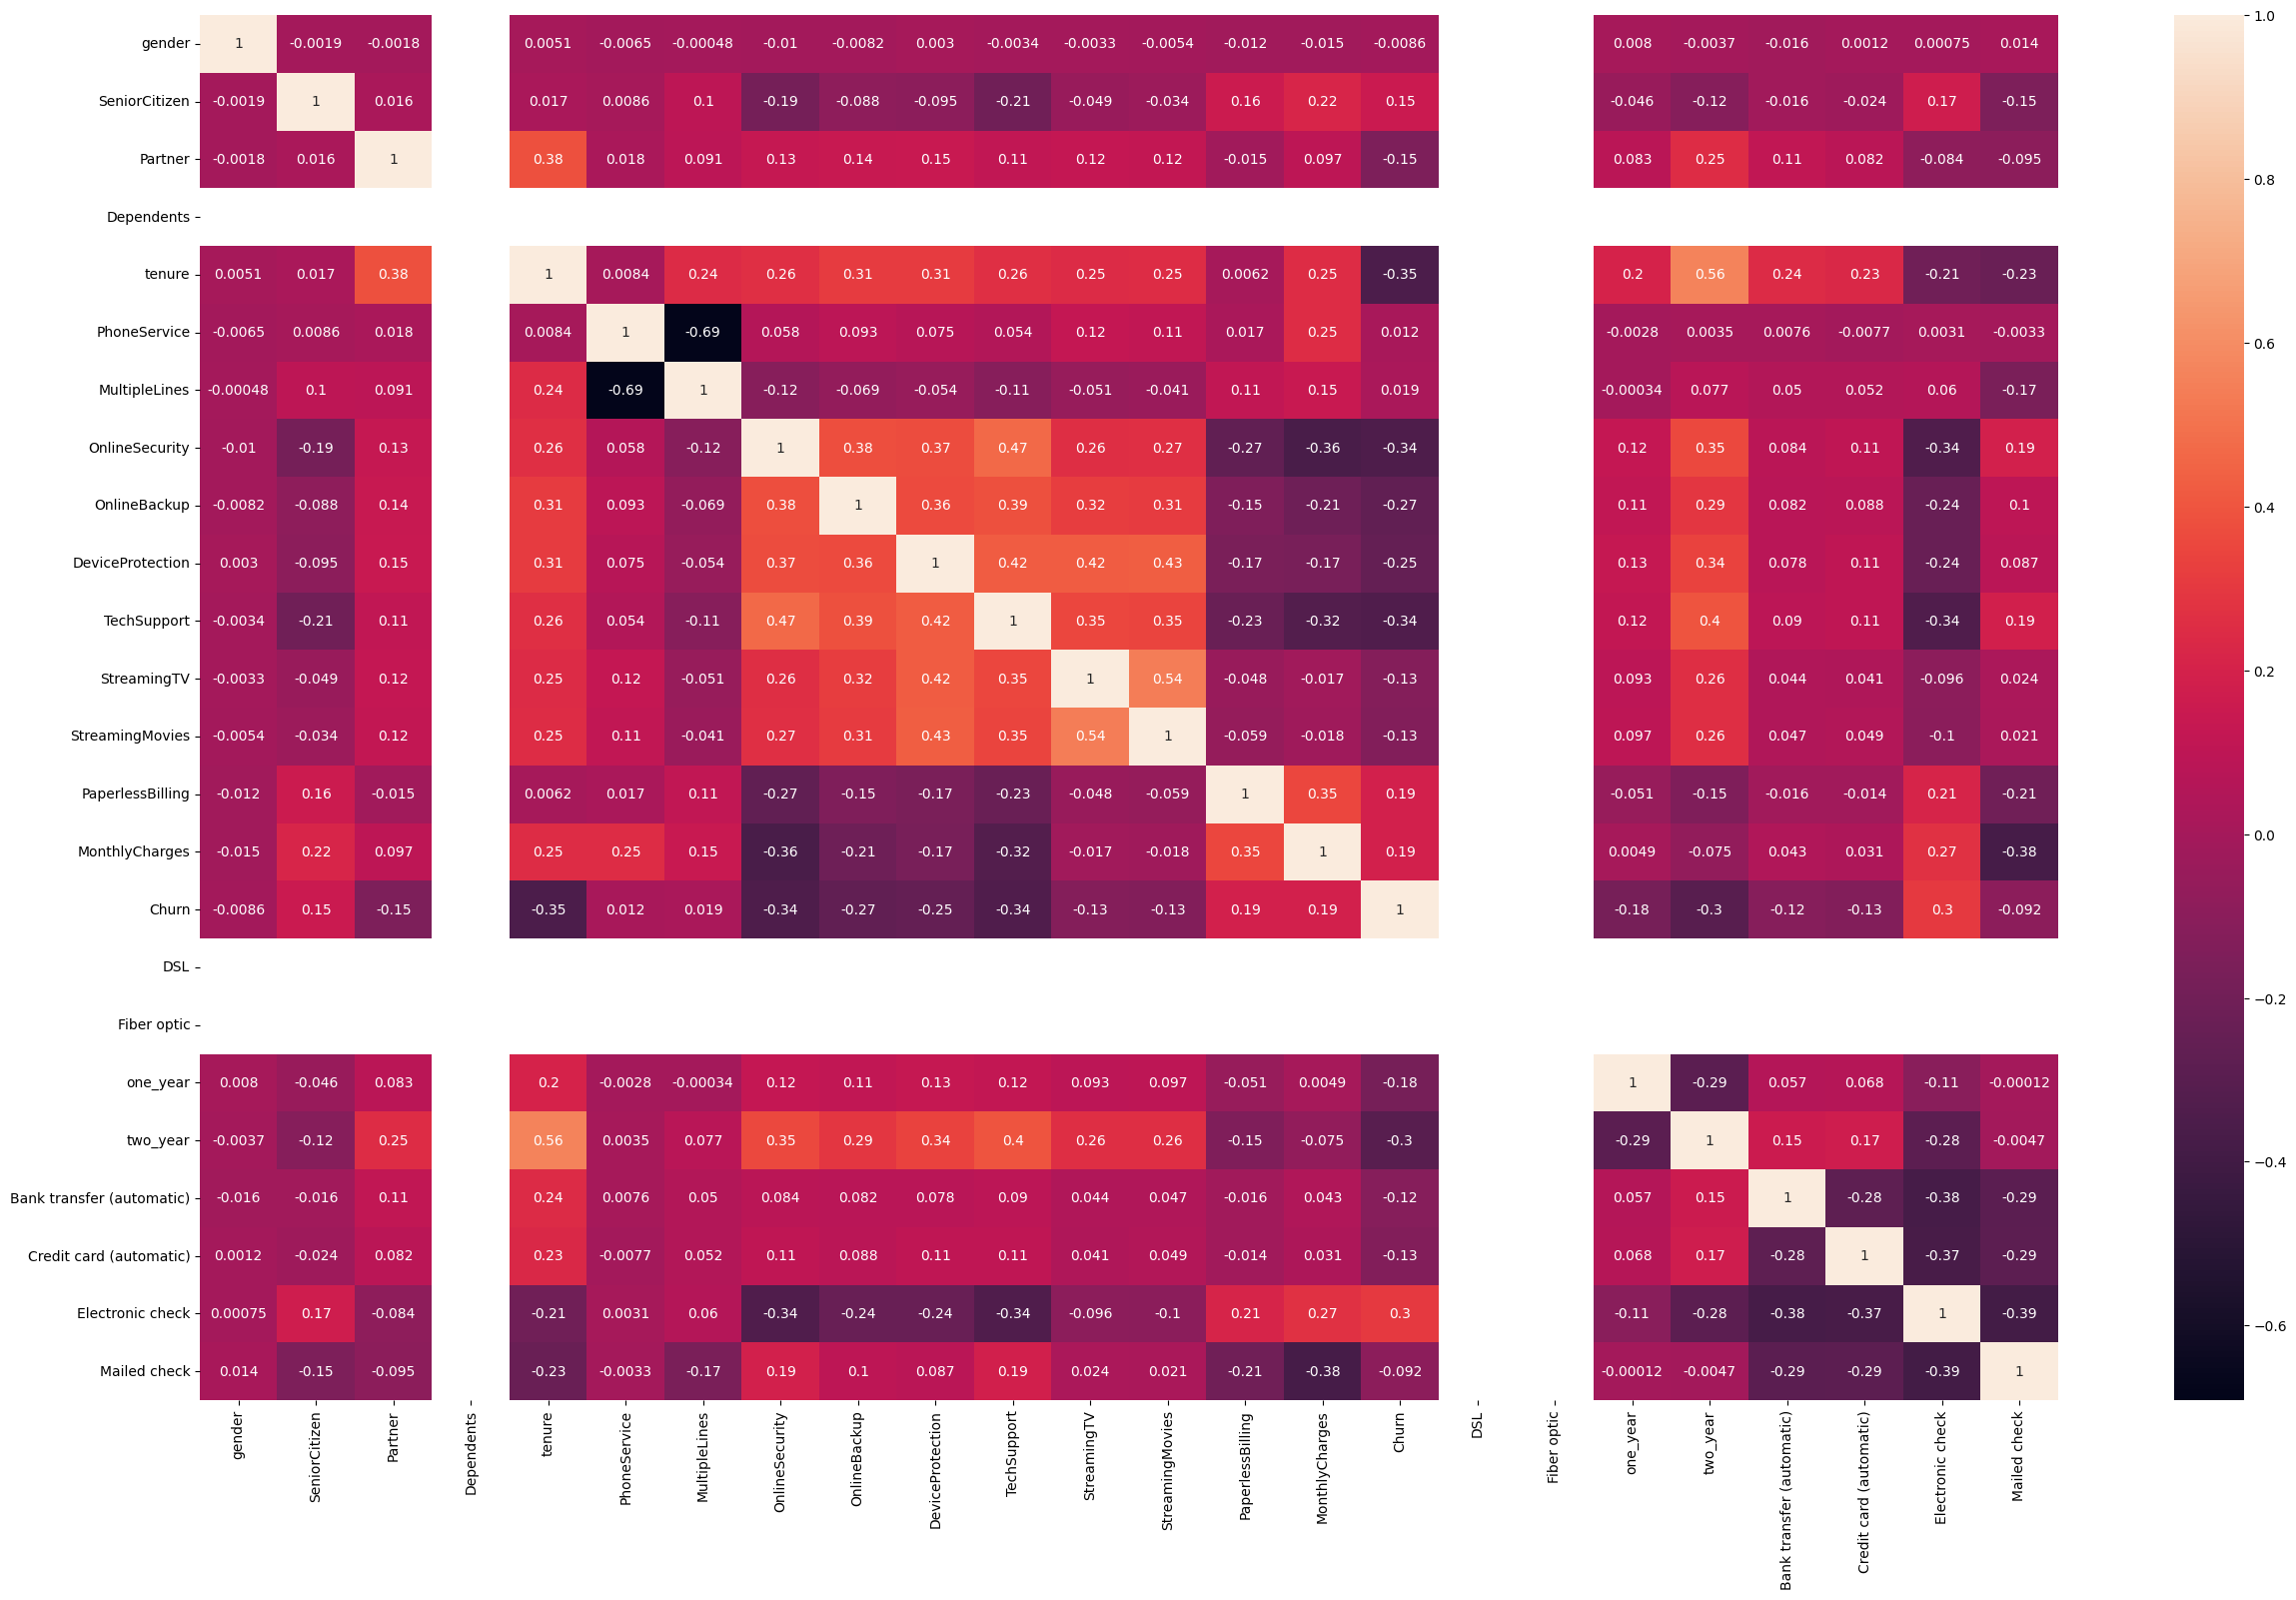

In [109]:
plt.figure(figsize=(30,18))
sns.heatmap(churn_dataset.corr(),annot=True)

#### Train Test Split

In [110]:
from sklearn.model_selection import train_test_split

X = churn_dataset.drop("Churn",axis=1)
y = churn_dataset["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

# Logistic Regression Model - 80.78%

In [111]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))
print(accuracy_score(y_test, log_preds))

[[1384  155]
 [ 251  323]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.56      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

0.8078561287269286


#Deep Learning Model

In [113]:
#Set the random seed
tf.random.set_seed(42)

#Make the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="sigmoid"),
    tf.keras.layers.Dense(10,activation="sigmoid"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit and run
history_1 = model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
155/155 [==============================] - 3s 4ms/step - loss: 0.5469 - accuracy: 0.7373
Epoch 2/100
155/155 [==============================] - 1s 4ms/step - loss: 0.4748 - accuracy: 0.7649
Epoch 3/100
155/155 [==============================] - 1s 4ms/step - loss: 0.4500 - accuracy: 0.7870
Epoch 4/100
155/155 [==============================] - 1s 4ms/step - loss: 0.4414 - accuracy: 0.7961
Epoch 5/100
155/155 [==============================] - 1s 4ms/step - loss: 0.4377 - accuracy: 0.7935
Epoch 6/100
155/155 [==============================] - 1s 5ms/step - loss: 0.4341 - accuracy: 0.7978
Epoch 7/100
155/155 [==============================] - 1s 4ms/step - loss: 0.4325 - accuracy: 0.7951
Epoch 8/100
155/155 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.7990
Epoch 9/100
155/155 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8010
Epoch 10/100
155/155 [==============================] - 0s 2ms/step - loss: 0.4294 - accura

### ACCURACY OF MODEL_1 = 80.37

In [114]:
#Model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="sigmoid"),
    tf.keras.layers.Dense(50,activation="sigmoid"),
    tf.keras.layers.Dense(10,activation="sigmoid"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr='0.001'),
                metrics=["accuracy"])

history_2 = model_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
155/155 [==============================] - 3s 7ms/step - loss: 0.5639 - accuracy: 0.7373
Epoch 2/200
155/155 [==============================] - 1s 6ms/step - loss: 0.4824 - accuracy: 0.7661
Epoch 3/200
155/155 [==============================] - 1s 5ms/step - loss: 0.4528 - accuracy: 0.7866
Epoch 4/200
155/155 [==============================] - 1s 3ms/step - loss: 0.4451 - accuracy: 0.7949
Epoch 5/200
155/155 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7951
Epoch 6/200
155/155 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.7957
Epoch 7/200
155/155 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.7939
Epoch 8/200
155/155 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.7943
Epoch 9/200
155/155 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8000
Epoch 10/200
155/155 [==============================] - 0s 2ms/step - loss: 0.4320 - accura

In [115]:
model_2.evaluate(X_test, y_test)

67/67 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.8017


[0.41715970635414124, 0.8017037510871887]